<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [27]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [28]:
# 병합한 데이터 불러오기
travel_log = pd.read_csv('data/training/merged_data/merge.csv', encoding='UTF-8')


In [29]:
# 데이터의 행, 열 개수 출력
print('merge.csv의 행, 열 개수 : ')
print(travel_log.shape)

merge.csv의 행, 열 개수 : 
(4292, 33)


In [30]:
# 데이터의 구조와 타입 확인
print('merge.csv의 구조와 타입 : ')
print(travel_log.info())

merge.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     4292 non-null   object 
 1   AGE_GRP                    4292 non-null   int64  
 2   JOB_NM                     4292 non-null   object 
 3   TRAVEL_TERM                4292 non-null   object 
 4   TRAVEL_LIKE_SGG_1          4292 non-null   int64  
 5   TRAVEL_LIKE_SGG_2          4292 non-null   int64  
 6   TRAVEL_LIKE_SGG_3          4292 non-null   int64  
 7   TRAVEL_STYL_1              4292 non-null   object 
 8   TRAVEL_STYL_2              4292 non-null   object 
 9   TRAVEL_STYL_3              4292 non-null   object 
 10  TRAVEL_STYL_4              4292 non-null   object 
 11  TRAVEL_STYL_5              4292 non-null   object 
 12  TRAVEL_STYL_6              4292 non-null   object 
 13  TRAVEL_STYL_7              

In [31]:
# 데이터의 결측치 확인
print('merge.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
MAJOR_TRANSPORT              0
TOTAL_MVMN_WON               0
MAJOR_ACTIVITY_TYPE          0
TOTAL_ACTIVITY_WON   

In [32]:
# 데이터 살펴보기
travel_log.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON,TOTAL_WON
0,여,20,학생,1년,50130,50110,26500,자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(약),자연 선호(약),자연 선호(중),도시 선호(중),도시 선호(중),광주광역시,전남,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g002178,연인,남자,20대,쇼핑;SNS 인생샷 여행;시티투어,2023-06-14,2023-06-16,시티투어;쇼핑;SNS 인생샷 여행,['자가용(승용/승합/트럭 등등)'],"10,000.00",['휴식'],"71,700.00","81,700.00"
1,남,40,전문가 및 관련 종사자,한달,48840,48220,26500,자연 선호(강),자연 선호(강),자연 선호(약),도시 선호(중),중립,자연 선호(중),도시 선호(강),도시 선호(강),대전광역시,전북,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g004485,연인,남자,30대,쇼핑;역사 유적지 방문;역사 유적지 방문;지역 문화예술/공연/전시시설 관람;유흥/오...,2023-07-28,2023-07-30,쇼핑;역사 유적지 방문;지역 문화예술/공연/전시시설 관람,['자가용(승용/승합/트럭 등등)'],"32,600.00",['체험 활동 / 입장 및 관람'],"273,800.00","306,400.00"
2,남,20,관리자,1년,46710,45190,47170,자연 선호(중),자연 선호(약),자연 선호(강),중립,도시 선호(중),자연 선호(약),자연 선호(강),도시 선호(강),서울특별시,전남,2인 여행(가족 외),새로운 경험 추구,1,g_g005167,연인,여자,20대,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;신...",2023-09-07,2023-09-10,SNS 인생샷 여행;신규 여행지 발굴;역사 유적지 방문,['자가용(승용/승합/트럭 등등)'],"138,400.00",['취식'],"450,200.00","588,600.00"
3,여,30,사무 종사자,한달,42150,42210,28710,자연 선호(중),자연 선호(중),자연 선호(약),자연 선호(중),자연 선호(약),도시 선호(약),자연 선호(중),도시 선호(중),인천광역시,대전,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g002887,배우자,여자,30대,쇼핑;시티투어;지역 축제/이벤트 참가;SNS 인생샷 여행;호캉스 여행,2023-07-01,2023-07-03,쇼핑;지역 축제/이벤트 참가;호캉스 여행,['자가용(승용/승합/트럭 등등)'],"70,000.00","['쇼핑 / 구매', '취식']","119,100.00","189,100.00"
4,남,20,서비스 종사자,한달,42150,50110,26350,자연 선호(중),자연 선호(강),자연 선호(중),중립,도시 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),경기도,충남,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004189,연인,남자,20대,"SNS 인생샷 여행;야외 스포츠, 레포츠 활동;유흥/오락(나이트라이프)",2023-07-18,2023-07-20,"Well-ness 여행;야외 스포츠, 레포츠 활동;SNS 인생샷 여행",['자가용(승용/승합/트럭 등등)'],"52,083.00",['취식'],"120,450.00","172,533.00"


<hr>
<h2>[분석 과정 - 기초 시각화]</h2>

In [33]:
# 주요 여행 동기 빈도 확인
print(travel_log['TRAVEL_MOTIVE'].value_counts())

TRAVEL_MOTIVE
여행 동반자와의 친밀감 및 유대감 증진               1340
일상적인 환경 및 역할에서의 탈출, 지루함 탈피           972
쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식        764
새로운 경험 추구                            403
역사 탐방, 문화적 경험 등 교육적 동기               275
운동, 건강 증진 및 충전                       142
특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)     138
SNS 사진 등록 등 과시                       123
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기           76
기타                                    59
Name: count, dtype: int64


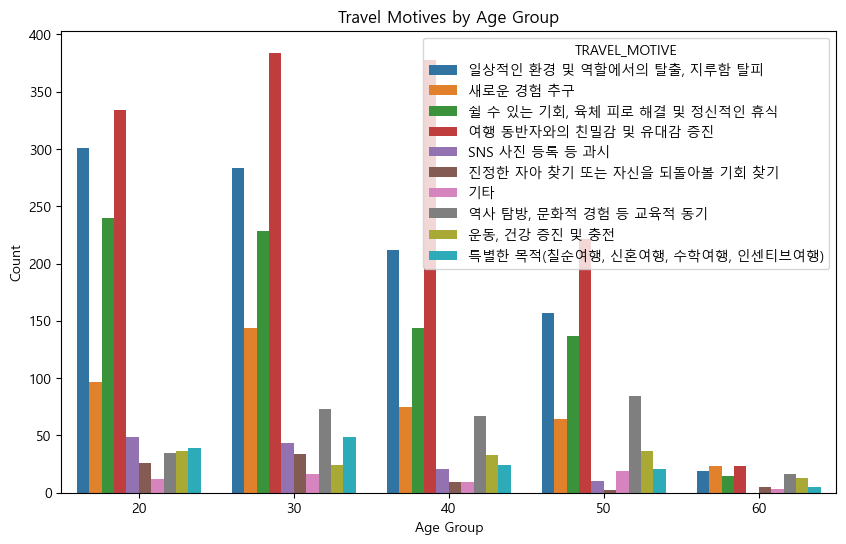

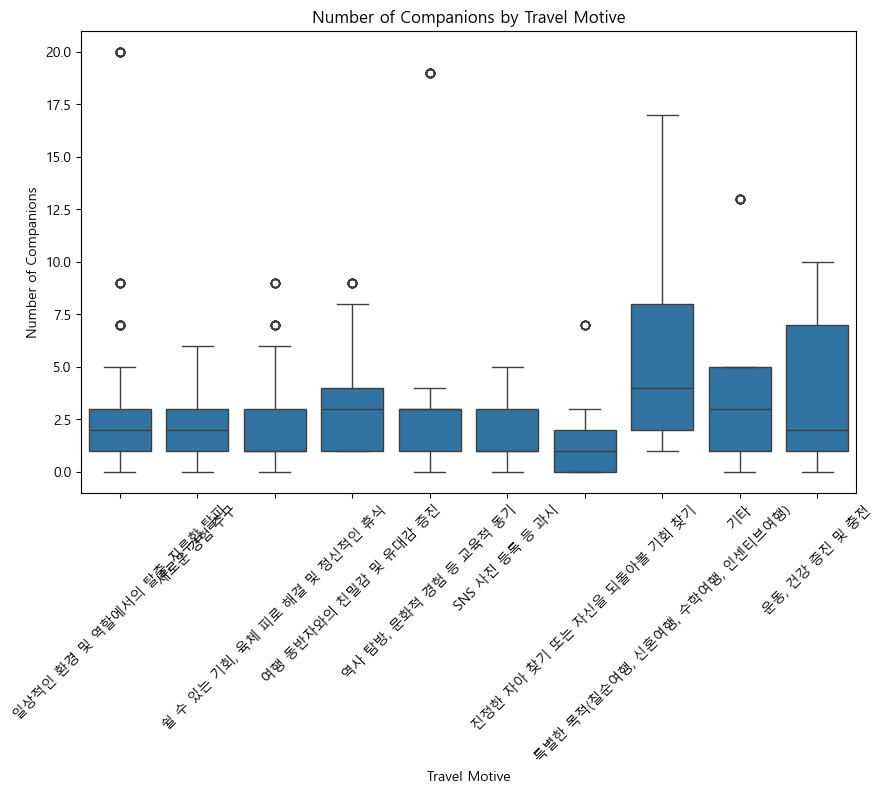

In [34]:
# 연령대별 여행 동기 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=travel_log, x='AGE_GRP', hue='TRAVEL_MOTIVE')
plt.title('Travel Motives by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 동행자 수와 여행 동기 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TRAVEL_MOTIVE', y='TRAVEL_COMPANIONS_NUM')
plt.title('Number of Companions by Travel Motive')
plt.xlabel('Travel Motive')
plt.ylabel('Number of Companions')
plt.xticks(rotation=45)
plt.show()


In [39]:
# 날짜 변환
travel_log['TRAVEL_START_YMD'] = pd.to_datetime(travel_log['TRAVEL_START_YMD'])
travel_log['TRAVEL_END_YMD'] = pd.to_datetime(travel_log['TRAVEL_END_YMD'])

# 여행 기간 계산
travel_log['TRAVEL_DURATION'] = (travel_log['TRAVEL_END_YMD'] - travel_log['TRAVEL_START_YMD']).dt.days

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION']].head(50))


   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION
0        2023-06-14     2023-06-16                2
1        2023-07-28     2023-07-30                2
2        2023-09-07     2023-09-10                3
3        2023-07-01     2023-07-03                2
4        2023-07-18     2023-07-20                2
5        2023-08-30     2023-08-31                1
6        2023-08-30     2023-08-31                1
7        2023-08-30     2023-08-31                1
8        2023-08-30     2023-08-31                1
9        2023-06-04     2023-06-07                3
10       2023-06-04     2023-06-07                3
11       2023-06-04     2023-06-07                3
12       2023-08-19     2023-08-20                1
13       2023-08-19     2023-08-20                1
14       2023-08-19     2023-08-20                1
15       2023-08-20     2023-08-22                2
16       2023-09-28     2023-09-29                1
17       2023-06-16     2023-06-18                2
18       202